# **📌 Introduction**

In today’s digital world, misinformation and fake news are widely spread across various platforms, making it difficult for readers to distinguish between real and fake content. The rise of social media and online news sources has amplified the spread of misleading information, which can have serious social, political, and economic consequences.

To combat this issue, **Natural Language Processing** (NLP) and **Machine
Learning (ML) techniques** can be leveraged to develop automated fake news detection systems. These AI-driven models analyze text content, extract meaningful patterns, and classify news articles as either **real** (label = 1) or **fake** (label = 0).

**🔍 Problem Statement**

The objective of this project is to develop a Fake News Detection System using
**Recurrent Neural Networks (RNNs)** and Natural Language Processing (NLP) techniques. The model will analyze textual data and classify whether a given news article is real or fake based on historical patterns.

**Key Aspects of the Problem:**

*   Fake news is often created to mislead people and influence opinions.
*   NLP techniques convert textual data into numerical representations
*  Machine Learning models, particularly RNNs (LSTM/BiLSTM), are trained to detect misleading patterns in news articles.

*   An AI-driven system can help automatically detect fake news, reducing human effort and misinformation spread.

*   The dataset consists of thousands of news texts labeled as real (1) or fake (0).

**🛠️ Approach to Solving the Problem**

To address this problem, we follow a structured approach:

**Data Preprocessing**

Cleaning text data by removing special characters, stopwords, and unnecessary information.
Tokenizing and lemmatizing words for better feature extraction.
Feature Engineering

Converting text into numerical features using TF-IDF vectorization.
Experimenting with word embeddings (Word2Vec, GloVe, BERT) for advanced feature representation.

**Model Selection & Training**

Implementing Recurrent Neural Networks (LSTM, BiLSTM) to analyze sequential dependencies in text.
Experimenting with Transformer-based models (BERT, RoBERTa) for more accurate classification.

**Model Evaluation & Optimization**

Tuning hyperparameters using GridSearchCV.
Applying dropout layers and regularization techniques to prevent overfitting.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

# **Loading the dataset from Hugging Face **

1.Install and import the datasets library

2.Import the load_dataset functionality from the datasets library

In [3]:
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 wh

In [4]:
from datasets import load_dataset

The function downloads the dataset from Hugging Face.

The dataset typically contains:
Text (News articles)
Labels (0 for Fake News, 1 for Real News)

The dataset is automatically formatted as a dictionary containing train/test splits.


In [5]:
data=load_dataset("ErfanMoosaviMonazzah/fake-news-detection-dataset-English")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/487 [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/78.4M [00:00<?, ?B/s]

validation.tsv:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/22.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8267 [00:00<?, ? examples/s]

This dataset consists of fake news classification data with three splits: train (30,000 rows), validation (6,000 rows), and test (8,267 rows).

 Each row contains features such as title, text, subject, date, and label (where label = 1 for real news and label = 0 for fake news).

 The dataset is structured for training, validating, and testing a machine learning model for fake news detection. 🚀

In [6]:
data

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'],
        num_rows: 30000
    })
    validation: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'],
        num_rows: 6000
    })
    test: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'],
        num_rows: 8267
    })
})

In [7]:
data.shape

{'train': (30000, 6), 'validation': (6000, 6), 'test': (8267, 6)}

## **PERFORM EXPLORATORY DATA ANALYSIS**

Converting a dataset into a Pandas DataFrame (to_pandas()) is essential for data analysis, preprocessing, and visualization in machine learning projects.

In [8]:
train_df = data['train'].to_pandas()
test_df = data['test'].to_pandas()


In [9]:
# Rename "Unnamed: 0" to "News_ID"
train_df.rename(columns={"Unnamed: 0": "News_ID"}, inplace=True)
test_df.rename(columns={"Unnamed: 0": "News_ID"}, inplace=True)

# Verify the change
print(train_df.head())
print(test_df.head())

   News_ID                                              title  \
0     2619  Ex-CIA head says Trump remarks on Russia inter...   
1    16043  YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...   
2      876  Federal Reserve governor Powell's policy views...   
3    19963  SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...   
4    10783  NANCY PELOSI ARROGANTLY DISMISSES Questions on...   

                                                text          subject  \
0  Former CIA director John Brennan on Friday cri...     politicsNews   
1  How did this man come to OWN this store? There...  Government News   
2  President Donald Trump on Thursday tapped Fede...     politicsNews   
3  Hillary Clinton ally David Brock is offering t...        left-news   
4  Pleading ignorance is a perfect ploy for Nancy...         politics   

                date  label  
0     July 22, 2017       1  
1       Jun 19, 2017      0  
2  November 2, 2017       1  
3       Sep 17, 2016      0  
4       May 26, 2017

In [10]:
len(train_df[train_df["label"]==0])


15478

In [11]:
len(train_df[train_df["label"]==1])

14522

In [12]:
news_dataset=pd.concat([train_df,test_df])

In [13]:
news_dataset.head()

,News_ID,title,text,subject,date,label
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0


**Pandas Supports Advanced Data Visualization**

Pandas works seamlessly with Matplotlib and Seaborn, allowing you to create interactive and statistical visualizations.

Example: Visualizing Label Distribution

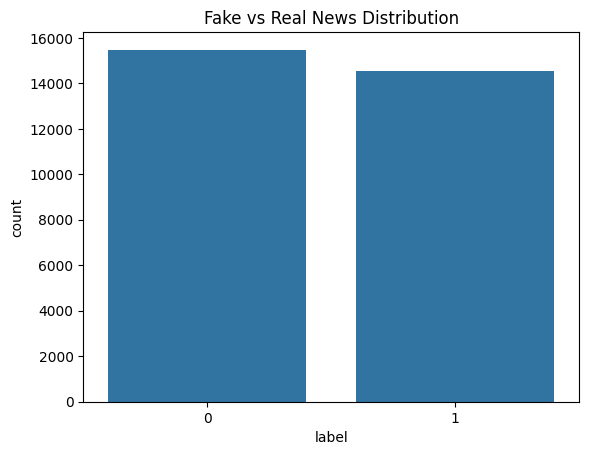

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=train_df["label"])
plt.title("Fake vs Real News Distribution")
plt.show()


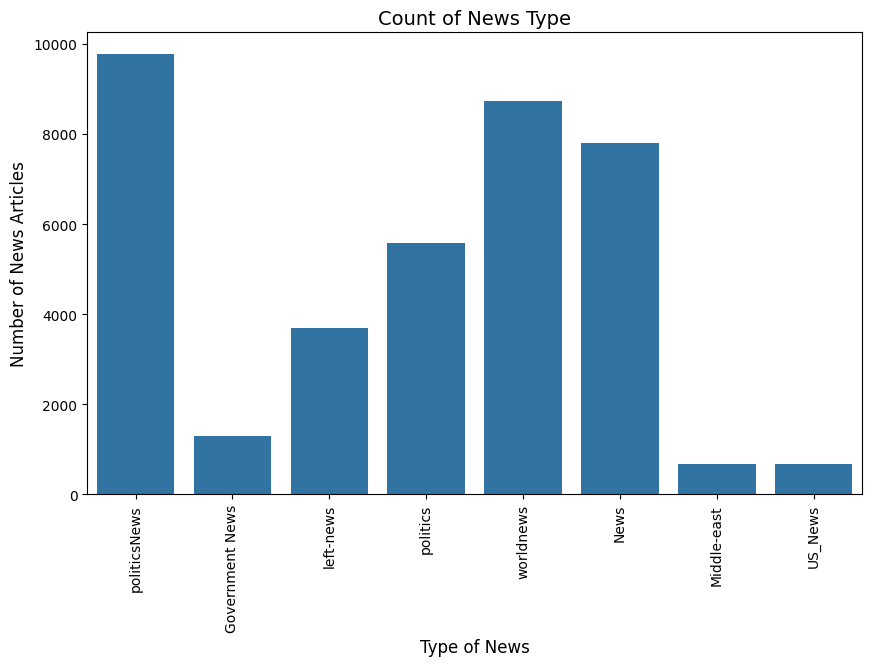

In [15]:
# Plotting the frequency plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = sns.countplot(x="subject", data=news_dataset)

# Setting labels and title
ax.set_xlabel('Type of News', fontsize=12)
ax.set_ylabel('Number of News Articles', fontsize=12)
ax.set_title('Count of News Type', fontsize=14)

# Explicitly set tick positions before modifying labels
ax.set_xticks(range(len(news_dataset["subject"].unique())))
ax.set_xticklabels(news_dataset["subject"].unique(), rotation=90, va="top")

# Show the plot
plt.show()


**Test Preprocessing**

• Text processing involves analyzing and manipulating textual data using various techniques.
It helps extract meaningful insights by breaking down words and sentences.

• This field is crucial in Natural Language Processing (NLP), enabling computers to understand, interpret, and generate human language.

•Key text processing tasks include:

Tokenization : Splitting sentences into individual words or phrases.

Stemming : Reducing words to their root or base form.  










In [16]:
clean_news=news_dataset.copy()

In [17]:
!pip uninstall -y nltk
!pip install --upgrade nltk


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 43.8 MB/s eta 0:00:00


In [18]:
import os
import shutil
import nltk

# Delete corrupted NLTK data
nltk_data_path = os.path.expanduser("~/nltk_data")
if os.path.exists(nltk_data_path):
    shutil.rmtree(nltk_data_path)
    print("Deleted corrupted NLTK data.")

# Redownload stopwords dataset
nltk.download("stopwords")




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
import nltk
from nltk.corpus import stopwords

# Manually set the NLTK path
nltk.data.path.append("/root/nltk_data")

# Verify stopwords
print("Stopwords loaded successfully:", stopwords.words('english')[:10])


Stopwords loaded successfully: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


**Removal of Stopwords **

Stop words are frequently occurring words that are often removed during text preprocessing because they provide little meaningful information.

Examples include "the," "and," "is," and "in," which do not significantly impact sentence meaning.

Eliminating stop words helps reduce noise in textual data and enhances the efficiency of text analysis.

In Natural Language Processing (NLP) and text mining, stop word lists are used to filter out these common words before further processing.

The set of stop words varies depending on the application and language being analyzed.

Many programming libraries, such as NLTK (Natural Language Toolkit) in Python, offer predefined lists of stop words for different languages.

Removing stop words allows the model to focus on more meaningful words, improving the accuracy and effectiveness of text analysis models.




















In [20]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')

def clean_text(text):
    """Cleans and preprocesses text for fake news classification."""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and special characters

    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization

    return " ".join(tokens)

# Apply the function to the dataset
news_dataset["text"] = news_dataset["text"].apply(clean_text)








[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
news_dataset["text"]=news_dataset["text"].apply(clean_text)
news_dataset["title"]=news_dataset["title"].apply(clean_text)
news_dataset.head()

,News_ID,title,text,subject,date,label
0,2619,excia head say trump remark russia interferenc...,former cia director john brennan friday critic...,politicsNews,"July 22, 2017",1
1,16043,wont believe punishment hispanic store owner s...,man come store information much fraudster exce...,Government News,"Jun 19, 2017",0
2,876,federal reserve governor powell policy view word,president donald trump thursday tapped federal...,politicsNews,"November 2, 2017",1
3,19963,scoundrel hillary supporter start trumpleaks c...,hillary clinton ally david brock offering pay ...,left-news,"Sep 17, 2016",0
4,10783,nancy pelosi arrogantly dismisses question cro...,pleading ignorance perfect ploy nancy pelosi b...,politics,"May 26, 2017",0


The following commands are used to install and set up SpaCy, a popular NLP (Natural Language Processing) library in Python.

This installs SpaCy, which provides efficient NLP tools such as tokenization, named entity recognition, part-of-speech tagging, and dependency parsing.

This downloads the English language model (en_core_web_sm), which is used for:

Tokenization (Splitting text into words/sentences)

Part-of-Speech (POS)

Tagging (Identifying nouns, verbs, adjectives, etc.)

Named Entity Recognition (NER) (Identifying names, locations, dates, etc.)

Dependency Parsing (Understanding sentence structure)


In [22]:
!pip install spacy
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 85.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [23]:
!pip install scikeras

In [24]:
!pip install --upgrade scikit-learn scikeras


In [25]:
from sklearn.feature_extraction.text import CountVectorizer


In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score,classification_report

In [27]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [28]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(news_dataset["text"])
x=tokenizer.texts_to_sequences(news_dataset["text"])

In [29]:
len(tokenizer.index_word)

185514

In [49]:
maxlen=50
X=pad_sequences(x,padding="pre",maxlen=maxlen)

In [50]:
#Extracting 'reviews' for processing
news_features=news_dataset.copy()
news_features=news_dataset[['text']].reset_index(drop=True)
news_features.head()

,text
0,former cia director john brennan friday critic...
1,man come store information much fraudster exce...
2,president donald trump thursday tapped federal...
3,hillary clinton ally david brock offering pay ...
4,pleading ignorance perfect ploy nancy pelosi b...



Stemming vs. Lemmatization
Stemming is a text normalization technique that reduces words to their root form, known as the "stem." This method removes suffixes to generate a common base, often by trimming word endings, even if the resulting stem is not a valid word.

🔹 Example of Stemming:

Original: "running"
Stemmed Form: "run"
Common stemming algorithms include Porter Stemmer and Snowball Stemmer.

Lemmatization, on the other hand, is a more advanced normalization method that converts words to their dictionary or base form ("lemma"). Unlike stemming, lemmatization ensures that the resulting word is valid and meaningful by considering linguistic rules and context.

🔹 Example of Lemmatization:

Original: "running"
Lemma: "run"
Lemmatization often relies on lexicons or linguistic databases to map words correctly. It takes into account part-of-speech and grammatical context to ensure accurate transformation.

In [51]:
nltk.download('stopwords')
nltk.download('wordnet')

# Set stopwords and initialize lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Performing lemmatization on the news dataframe
corpus = []
for i in range(0, len(news_dataset)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['text'][i])
    news = news.lower()
    news = news.split()
    news = [lemmatizer.lemmatize(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
words = set()
for i in range(len(corpus[:])):
  for j in corpus[i].split():
    # print(j)
    words.add(j)
print("Number of documents in the Corpus is",len(corpus))
print("Length of all the words in the Corpus is",len(words))

Number of documents in the Corpus is 38267
Length of all the words in the Corpus is 185509


## **One hot encoding**
Before constructing neural network layers, it is essential to define the vocabulary size, which represents the total count of unique words in the text corpus. The vocabulary size plays a crucial role in preparing text data for embedding layers, particularly through one-hot encoding.

One-hot encoding is a method used to convert categorical data, such as words in a sentence, into binary vectors. In NLP, each word in the vocabulary is assigned a unique index, and one-hot encoding represents it as a binary vector where only the corresponding index is set to 1, while all others remain 0. The vocabulary size determines the length of these binary vectors, ensuring that words are consistently represented within a predefined range.

Setting a fixed vocabulary size, such as 5000, helps maintain computational efficiency and manage memory usage, especially when dealing with large datasets. However, it is important to find a balance—limiting the vocabulary size too much may exclude significant words, while an excessively large vocabulary can increase processing overhead.

In summary, defining the vocabulary size is a key step in text preprocessing for neural network models, ensuring that words are effectively represented numerically for NLP tasks.

In [53]:
from tensorflow.keras.preprocessing.text import one_hot
#Setting up vocabulary size
voc_size=10000

#One hot encoding
onehot_repr=[one_hot(words,voc_size)for words in corpus]

**Pre-Padding**

In neural networks, particularly LSTM models, maintaining a consistent input shape is crucial for effective processing. However, when dealing with text data, sentences or documents often vary in length, requiring a technique called padding to standardize input sizes. Padding involves appending extra tokens or characters to text sequences so that all inputs reach a uniform length. Typically, this is achieved by setting a maximum sequence length, often determined by the longest sentence in the dataset—commonly set to 5000 in this case.

Libraries like Keras and PyTorch offer the pad_sequence() function, which automates the padding process, ensuring that all sequences conform to the required length. For text data in LSTM models, 'pre-padding' is frequently used, where padding tokens (such as zeros) are added at the beginning of sentences. This approach ensures that all input sequences maintain a uniform structure, allowing the LSTM model to process them consistently and effectively extract patterns from the text.

In [54]:
sent_length=200

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[1179 2731 7842 ... 5036 7842  315]
 [5290 7175 9783 ... 8481 9668 8660]
 [3639 8666 8728 ... 4634 6920 3529]
 ...
 [2491 8666 7428 ... 1144 4952 6330]
 [8725 9513 4530 ... 5567 6297 4648]
 [9093 2332 2731 ... 2947 6345 9246]]




---


**TF-IDF (Term Frequency-Inverse Document Frequency)** is a technique used to
convert textual data into numerical values by assigning importance scores to words in a document.
It helps identify important words while down-weighting frequently occurring but less informative words.

✅Reduces computational complexity by selecting only the top 5000 words.

✅ Ensures unbiased evaluation by splitting data into training and testing sets.

🚀 This prepares the dataset for training an ML model to classify fake vs. real news effectively! 🔥

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 words
X_tfidf = vectorizer.fit_transform(news_dataset["text"])

# Convert to dense matrix for model training
X = X_tfidf.toarray()
y = news_dataset["label"].values

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Deep learning-LSTM**
In this part, we're leveraging a neural network to predict whether a given piece of news is fake or genuine.

Instead of using a traditional feedforward neural network like Artificial Neural Networks (ANN), we're employing a specialized type of recurrent neural network called Long Short-Term Memory (LSTM).

LSTM networks are designed to capture and learn dependencies over time or sequence information in data.

They are particularly effective in handling sequence prediction tasks where maintaining long-range dependencies is crucial, such as language modeling, machine translation, speech recognition, and sentiment analysis.

One of the key advantages of LSTM networks is their ability to address the vanishing gradient problem, which is common in traditional recurrent neural networks.
This problem arises when gradients become extremely small during training, hindering the ability of the network to learn long-term dependencies.

LSTM networks overcome this issue by incorporating specialized memory cells and gating mechanisms, allowing them to selectively retain or forget information over time.

The architecture of an LSTM network includes three main components: input gates, forget gates, and output gates. These gates control the flow of information within the network, enabling it to process sequential data effectively.





In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X is your feature matrix (2D) and y is your target variable (1D)
# Example data (replace with your actual dataset)
X = np.random.rand(1000, 10)  # Example 1000 samples with 10 features
y = np.random.randint(0, 2, 1000)  # Example binary target (0 or 1)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Reshape the data into 3D arrays (samples, time_steps, features) for LSTM
# In this example, we assume 1 time step and multiple features per sample
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Scaling the features (optional but recommended for neural networks)
scaler = StandardScaler()

# Fit scaler on training data and transform both train and test
X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

# Print the shapes to confirm
print(X_train.shape)  # Should be (samples, 1, features)
print(X_test.shape)   # Should be (samples, 1, features)


(800, 1, 10)
(200, 1, 10)


In [56]:
from sklearn.model_selection import GridSearchCV
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier # This line is causing the error
from scikeras.wrappers import KerasClassifier # Import KerasClassifier from scikeras instead


def create_model(optimizer='adam', dropout_rate=0.3):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# The rest of your code remains the same...

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Embedding, Input
from tensorflow.keras.optimizers import Adam

# Define the LSTM model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),  # Fully connected layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.9171 - loss: 0.1929 - val_accuracy: 0.9795 - val_loss: 0.0623
Epoch 2/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.9937 - loss: 0.0215 - val_accuracy: 0.9822 - val_loss: 0.0628
Epoch 3/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.9978 - loss: 0.0076 - val_accuracy: 0.9792 - val_loss: 0.0858
Epoch 4/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.9989 - loss: 0.0029 - val_accuracy: 0.9807 - val_loss: 0.0965
Epoch 5/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.9987 - loss: 0.0039 - val_accuracy: 0.9825 - val_loss: 0.1024
Epoch 6/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.9991 - loss: 0.0023 - val_accuracy: 0.9795 - val_loss: 0.1229
Epoch 7/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 0.9813 - val_loss: 0.1287
Epoch 8/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9999 - loss: 7.5630e-0

In [60]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Ensure y_pred contains probabilities
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

print(cm)


240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[[3918   64]
 [  81 3591]]


In [66]:
print("Original X_test shape:", X_test.shape)
print("Expected model input shape:", model.input_shape)




Original X_test shape: (200, 1, 10)
Expected model input shape: (None, 5000)


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Reapply TF-IDF vectorization with 5000 features
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(news_dataset["text"])

# Convert to array for model input
X = X_tfidf.toarray()
y = news_dataset["label"].values

# Re-split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("New X_test shape:", X_test.shape)  # Should now match (batch_size, 5000)


New X_test shape: (7654, 5000)


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Reapply TF-IDF vectorization with 5000 features
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(news_dataset["text"])

# Convert to array for model input
X = X_tfidf.toarray()
y = news_dataset["label"].values

# Re-split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("New X_test shape:", X_test.shape)  # Should now match (batch_size, 5000)


New X_test shape: (7654, 5000)


In [70]:
print("Sample y_pred1 values:", y_pred1[:10])
print("Unique values in y_pred1:", set(y_pred1.flatten()))



Sample y_pred1 values: [[1.0000000e+00]
 [4.6562212e-11]
 [9.9999982e-01]
 [9.9982667e-01]
 [4.3461193e-13]
 [4.9224354e-15]
 [3.6743597e-10]
 [2.0094993e-04]
 [1.2385691e-11]
 [1.0000000e+00]]
Unique values in y_pred1: {0.9999998, 1.0, 0.99982667, 0.00020094993, 1.310073e-18, 0.99857056, 0.99999976, 0.9999879, 0.99968886, 1.0855632e-24, 2.1829712e-20, 0.9999942, 0.9999996, 0.9996354, 8.761879e-22, 0.99998975, 1.1569204e-18, 4.449164e-18, 9.01138e-19, 4.341459e-18, 8.701807e-18, 1.8058864e-18, 9.684928e-18, 6.392638e-18, 1.0537221e-17, 5.936593e-12, 2.3594918e-18, 2.4922627e-18, 2.1612474e-18, 1.1044682e-17, 2.2566449e-18, 1.9461422e-20, 0.00016808906, 0.9999787, 0.99906576, 0.9999999, 0.0011682531, 0.99999547, 0.999879, 1.4810293e-17, 1.7340104e-17, 3.2177444e-18, 1.7453251e-17, 1.7799319e-17, 1.5336951e-17, 1.7798098e-17, 4.0602777e-18, 4.2092194e-18, 4.2712174e-18, 2.1635503e-17, 4.2494402e-18, 4.702248e-18, 2.2744588e-17, 2.3047747e-17, 4.7267966e-18, 2.4083911e-17, 1.2852926e-18, 

In [73]:
y_pred1_binary = (y_pred1 > 0.5).astype(int)

# Now calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred1_binary)
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 0.98%
